In [2]:
!mkdir ~/.kaggle

In [3]:
!cp /content/kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

 70% 62.0M/89.0M [00:00<00:00, 224MB/s]
100% 89.0M/89.0M [00:00<00:00, 223MB/s]


In [6]:
!unzip /content/zomato-bangalore-restaurants.zip -d zomato-bangalore-restaurants

Archive:  /content/zomato-bangalore-restaurants.zip
  inflating: zomato-bangalore-restaurants/zomato.csv  


# Exploratory Data Analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
data = pd.read_csv('/content/zomato-bangalore-restaurants/zomato.csv')

In [ ]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
data.shape

(51717, 17)

In [ ]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [ ]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
df = data.drop(['url','phone'], axis=1)

In [ ]:
df.duplicated().sum()

43

In [10]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [11]:
df.dropna(how='any', inplace=True)
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [ ]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [12]:
df = df.rename(columns={'approx_cost(for two people)':'cost',
                        'listed_in(type)':'type','listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [13]:
df[df['menu_item']=='[]']['menu_item'].count()

16570

In [ ]:
df['menu_item'].count()

23395

In [14]:
df['cost'] = df['cost'].apply(lambda x: x.replace(',',''))
df['cost'] = df['cost'].astype(float)

In [15]:
df = df[df['rate']!='NEW']

In [16]:
df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))
df['rate'] = df['rate'].astype(float)

In [ ]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

### Famous restaurants chain in Bengaluru

In [ ]:
df.shape

(23248, 15)

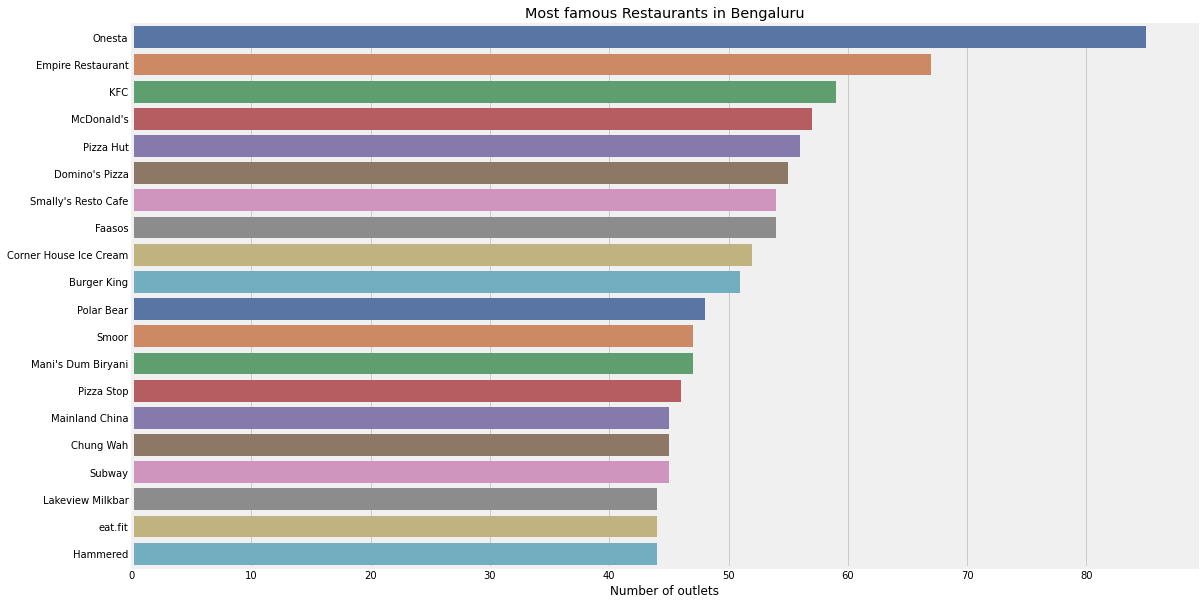

In [ ]:
chain = df['name'].value_counts()[:20]
plt.figure(figsize=(17,10))
sns.barplot(x=chain, y=chain.index, palette='deep')
plt.title('Most famous Restaurants in Bengaluru')
plt.xlabel('Number of outlets')
plt.show()

### Whether Restaurants Offer Table bookings or not

In [ ]:
x = df['book_table'].value_counts()
color = ['#800080','#0000A0']
trace = go.Pie(labels=x.index, values=x, textinfo='value', 
               marker=dict(colors=color, line=dict(color='#001000', width=2)))
layout = go.Layout(title='Table booking', width=600, height=600)
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename='pie_charts_subplots')

### Most of the Restaurants do not offer bookings

### Whether Restaurants deliver online or not

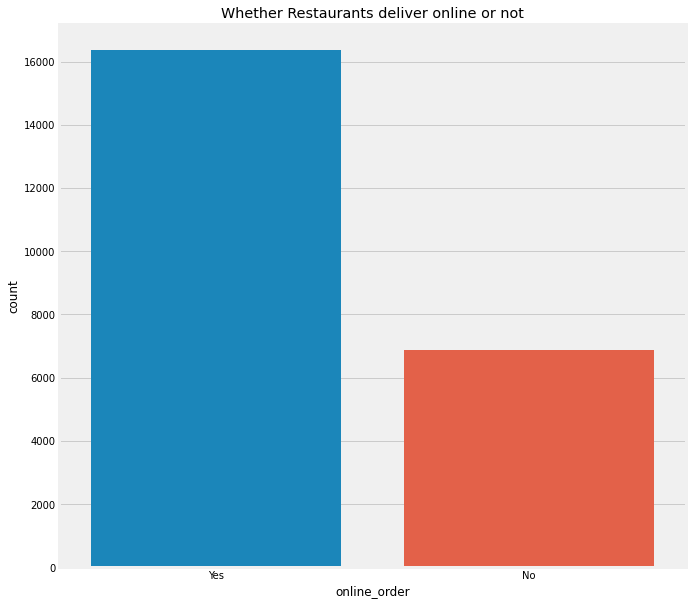

In [ ]:
sns.countplot(df['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Whether Restaurants deliver online or not')
plt.show()

### How ratings are distributed

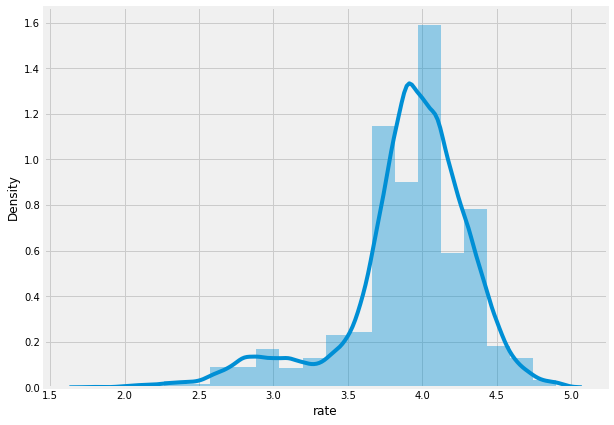

In [ ]:
plt.figure(figsize=(9,7))
sns.distplot(df['rate'], bins=20)

### Check the rating in different range

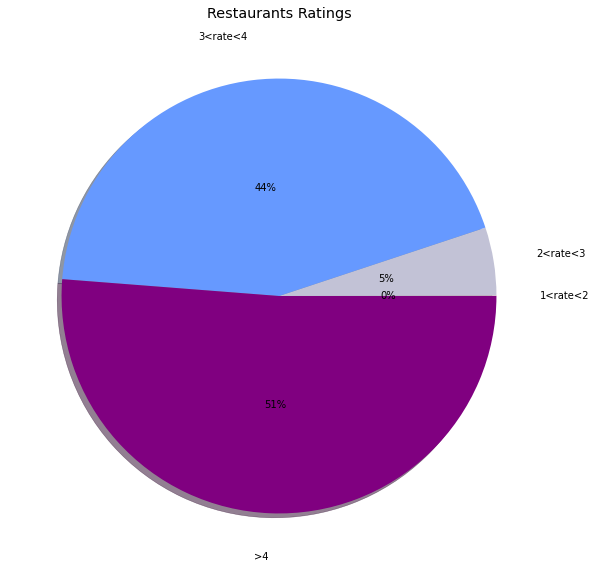

In [ ]:
slices = [((df['rate']>=1) & (df['rate']<2)).sum(),
          ((df['rate']>=2) & (df['rate']<3)).sum(),
          ((df['rate']>=3) & (df['rate']<4)).sum(),
          (df['rate']>=4).sum()]
        
labels = ['1<rate<2','2<rate<3','3<rate<4','>4']
colors = ['#ff3333','#c2c2d6','#6699ff','#800080']
plt.pie(slices, colors=colors, labels=labels,
        autopct='%1.0f%%',pctdistance=0.5,
        labeldistance = 1.2, shadow=True)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants Ratings')
plt.show()

### Types of Services in Restaurants

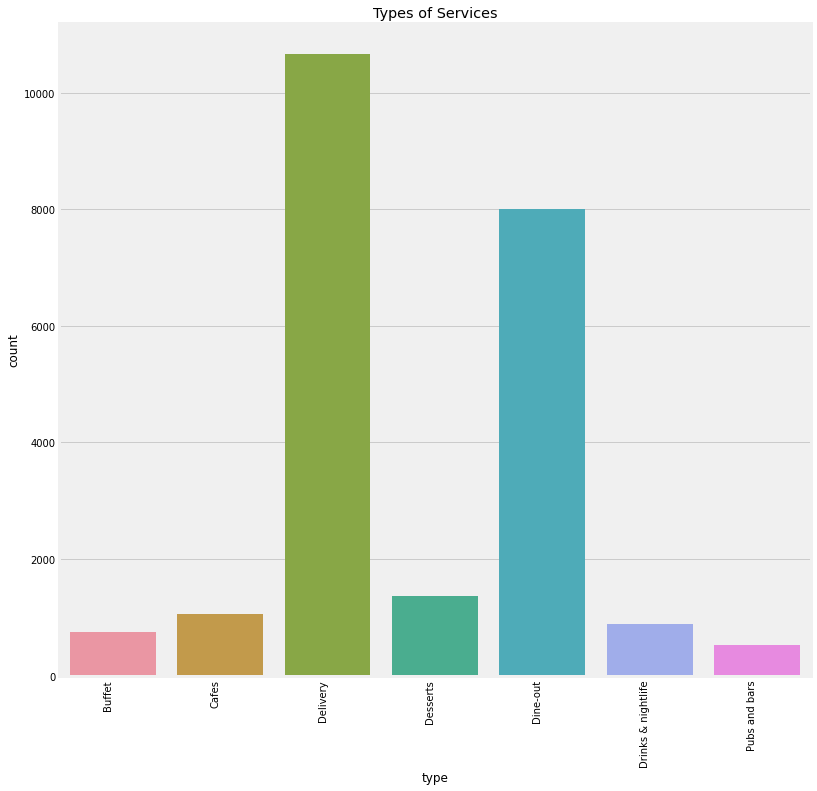

In [ ]:
sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation=90, ha='right')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Types of Services')
plt.show()

### Distribution of Cost of Food for 2 people

In [ ]:
trace = go.Box(y = df['cost'], name='Accepting Online Orders', 
               marker= dict(color = 'rgb(113, 10, 100)'))
layout = go.Layout(title='Box plot of approximate cost', width=800, height=800, yaxis=dict(title='Price'))
fig = go.Figure(data=trace, layout = layout)
py.iplot(fig)

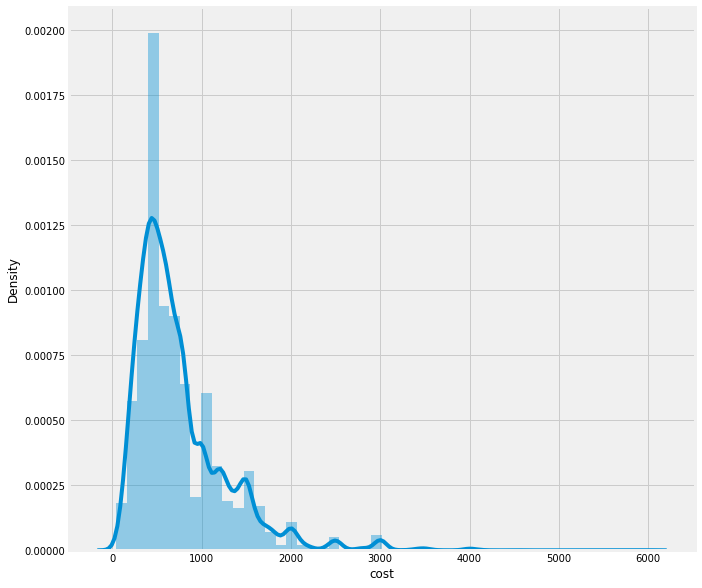

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df['cost'])
plt.show()

### Most Favourite Dishes 

In [ ]:
array_split = list(df['dish_liked'].apply(lambda x: x.split(',')))
liked= []
for i in array_split:
  for j in i:
    liked.append(j)

In [ ]:
df.index = range(df.shape[0])

In [ ]:
favourite_food = pd.Series(liked).value_counts()
favourite_food.head(20)

 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
dtype: int64

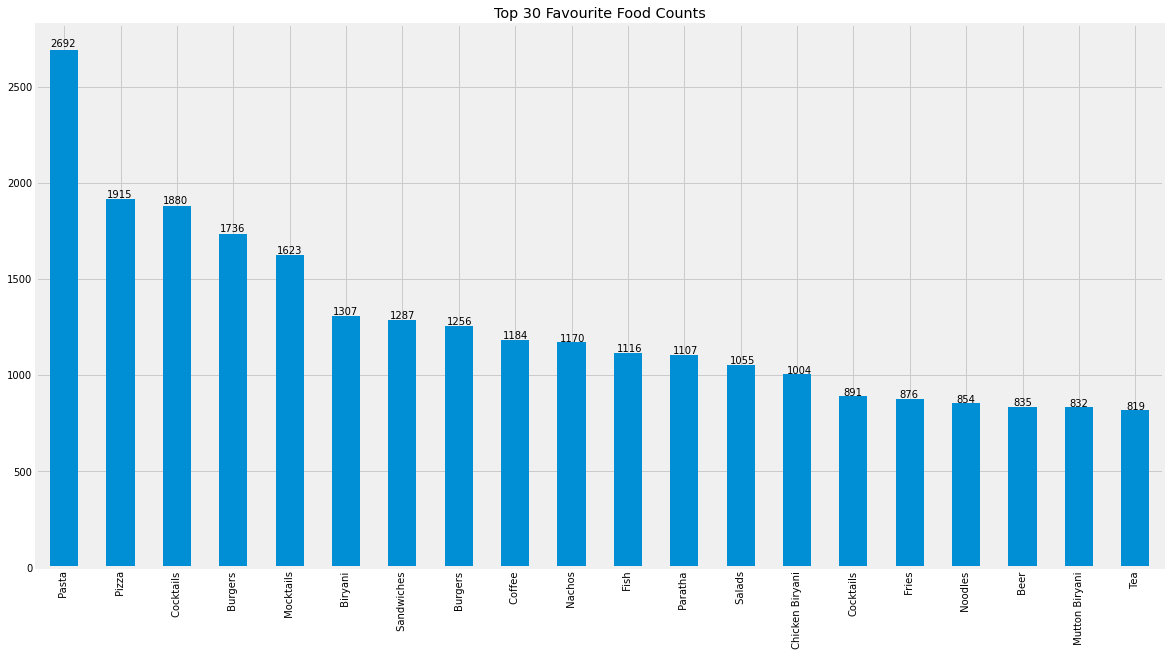

In [ ]:
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar', 
                                           figsize=(18,10), title='Top 30 Favourite Food Counts')
for i in ax.patches:
  ax.annotate(str(i.get_height()), (i.get_x()* 1.005, i.get_height()* 1.005))

### Most of the Restaurant Types

Text(0.5, 0, 'count')

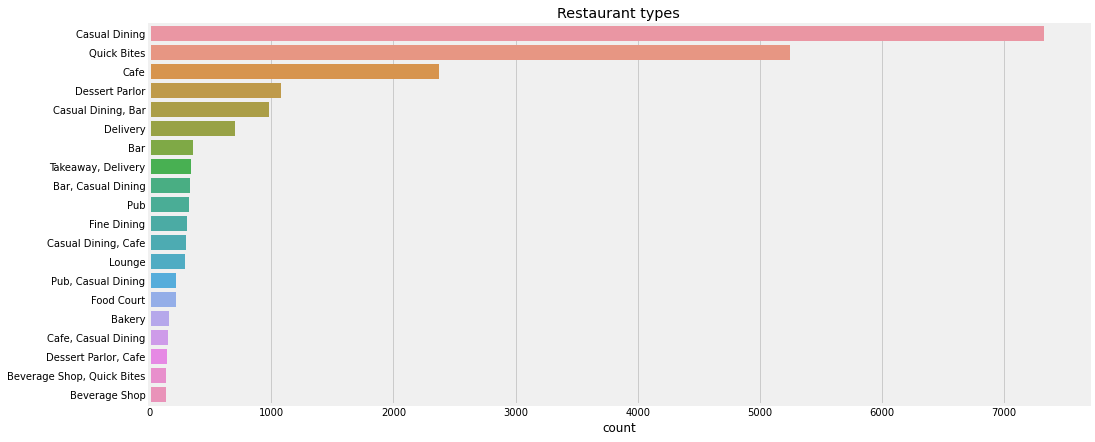

In [ ]:
plt.figure(figsize=(15,7))
rest = df['rest_type'].value_counts()[:20]
sns.barplot(rest, rest.index)
plt.title('Restaurant types')
plt.xlabel('count')

# Model Building

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pickle

### Changing the Binary categorical columns into numeric columns



In [17]:
df['online_order'][df['online_order']=='Yes'] = 1
df['online_order'][df['online_order']=='No'] = 0

In [18]:
df['online_order'] = df['online_order'].astype(int)

In [19]:
df['online_order'].value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

In [20]:
df['book_table'][df['book_table']=='Yes']=1
df['book_table'][df['book_table']=='No']=0
df['book_table'] = df['book_table'].astype(int)

In [21]:
df['book_table'].value_counts()

0    17191
1     6057
Name: book_table, dtype: int64

### Changing the multi categorical columns into numeric columns 

In [25]:
le = LabelEncoder()

In [26]:
df['location'] = le.fit_transform(df['location'])
df['rest_type'] = le.fit_transform(df['rest_type'])
df['cuisines'] = le.fit_transform(df['cuisines'])
df['menu_item'] = le.fit_transform(df['menu_item'])

In [ ]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari


In [28]:
data = df.iloc[:,[2,3,4,5,6,7,9,10,12]]
data.to_csv('zomato.csv',index=False, index_label=False)

In [ ]:
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [ ]:
y = df['rate']

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=10)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res*100)

22.81882852296705


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res*100)

87.61570995859309


In [ ]:
rf_model = RandomForestRegressor(n_estimators=650, random_state = 245, min_samples_leaf = 0.0001)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res*100)

88.09706960047534


In [ ]:
et_model = ExtraTreesRegressor(n_estimators=120)
et_model.fit(X_train, y_train)
y_pred = et_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res*100)

93.42531127010515


In [ ]:
pickle.dump(et_model, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))